A quick example on how to classify on a specific bread: beagle

In [15]:
import fastbook
fastbook.setup_book()

from fastbook import *

from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

Define the function used to determine if an image is a beagle.  Remember lower names are dogs and the type of dog is the first part of the image name.

In [16]:
def is_beagle(x): 
    return x.__contains__("beagle")

In [18]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_beagle, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.918435,0.358870,0.172717,00:09


epoch,train_loss,valid_loss,error_rate,time
0,0.353426,0.142593,0.029703,00:12
1,0.199274,0.050981,0.006601,00:12
2,0.114806,0.034216,0.006601,00:12


In [31]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

Is this a beagle?: False.
Probability it's a beagle: 0.301742


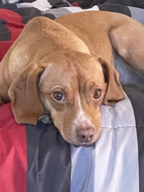

In [32]:
img = PILImage.create(uploader.data[0])
is_beagle,_,probs = learn.predict(img)
print(f"Is this a beagle?: {is_beagle}.")
print(f"Probability it's a beagle: {probs[1].item():.6f}")
img.to_thumb(192)